In [323]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [324]:
df = pd.read_csv(r"C:\Users\acer\Downloads\Titanic-Dataset.csv")

In [325]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df["Embarked"] = imputer.fit_transform(df[["Embarked"]]).ravel()

In [326]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [327]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [328]:
df["Embarked"] = encoder.fit_transform(df["Embarked"])
df["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [329]:
df["Embarked"].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [330]:
x = df.drop(columns=["Survived","PassengerId","Name","Ticket","Age","Cabin"])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int32  
dtypes: float64(1), int32(2), int64(3)
memory usage: 34.9 KB


In [331]:
x.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [332]:
x

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1,1,0,7.2500,2
1,1,0,1,0,71.2833,0
2,3,0,0,0,7.9250,2
3,1,0,1,0,53.1000,2
4,3,1,0,0,8.0500,2
...,...,...,...,...,...,...
886,2,1,0,0,13.0000,2
887,1,0,0,0,30.0000,2
888,3,0,1,2,23.4500,2
889,1,1,0,0,30.0000,0


In [333]:
y = df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

LOGISTIC REGRESSION

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [336]:
logmodel = LogisticRegression()
decisionmodel = DecisionTreeClassifier()
randommodel =  RandomForestClassifier()

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=42)

In [339]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((623, 6), (268, 6), (623,), (268,))

In [340]:
logmodel.fit(xtrain,ytrain)

LogisticRegression()

In [341]:
lypred = logmodel.predict(xtest)
lypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [342]:
decisionmodel.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [343]:
dypred = decisionmodel.predict(xtest)
dypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [344]:
randommodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [345]:
rypred 

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [346]:
from sklearn.metrics import accuracy_score

In [347]:

Logisticaccuracyscore = accuracy_score(ytest,lypred)
Decisionaccuracyscore = accuracy_score(ytest,dypred)
randomforestaccuracyscore = accuracy_score(ytest,rypred)

In [348]:
Logisticaccuracyscore

0.7761194029850746

In [349]:
Decisionaccuracyscore

0.7798507462686567

In [350]:
randomforestaccuracyscore

0.7723880597014925

In [351]:
proba_logistic = logmodel.predict_proba(xtest)
proba_decision = decisionmodel.predict_proba(xtest)
proba_randomforest = randommodel.predict_proba(xtest)

In [352]:
proba_randomforest

array([[0.30666667, 0.69333333],
       [0.83402871, 0.16597129],
       [0.49800985, 0.50199015],
       [0.05      , 0.95      ],
       [0.65      , 0.35      ],
       [0.        , 1.        ],
       [0.24675849, 0.75324151],
       [0.95      , 0.05      ],
       [0.24675849, 0.75324151],
       [0.02      , 0.98      ],
       [0.50733333, 0.49266667],
       [0.90188587, 0.09811413],
       [0.96      , 0.04      ],
       [0.86374148, 0.13625852],
       [0.86139601, 0.13860399],
       [0.08      , 0.92      ],
       [0.47483333, 0.52516667],
       [0.05727273, 0.94272727],
       [0.86139601, 0.13860399],
       [0.98      , 0.02      ],
       [1.        , 0.        ],
       [0.62209962, 0.37790038],
       [0.858     , 0.142     ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.90166667, 0.09833333],
       [0.9775    , 0.0225    ],
       [0.86139601, 0.13860399],
       [0.90166667, 0.09833333],
       [0.52316667, 0.47683333],
       [1.

In [353]:
proba_decision

array([[1.        , 0.        ],
       [0.81818182, 0.18181818],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [0.85      , 0.15      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.85      , 0.15      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.625     , 0.375     ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.85      , 0.15      ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.

In [354]:
proba_logistic

array([[0.83946696, 0.16053304],
       [0.79598302, 0.20401698],
       [0.88885558, 0.11114442],
       [0.24278289, 0.75721711],
       [0.28848462, 0.71151538],
       [0.11511124, 0.88488876],
       [0.31928611, 0.68071389],
       [0.92037218, 0.07962782],
       [0.31928611, 0.68071389],
       [0.1462643 , 0.8537357 ],
       [0.67517748, 0.32482252],
       [0.88882166, 0.11117834],
       [0.54682313, 0.45317687],
       [0.80421088, 0.19578912],
       [0.7948656 , 0.2051344 ],
       [0.13403789, 0.86596211],
       [0.67550619, 0.32449381],
       [0.31923883, 0.68076117],
       [0.7948656 , 0.2051344 ],
       [0.63105049, 0.36894951],
       [0.88886351, 0.11113649],
       [0.64717211, 0.35282789],
       [0.4439252 , 0.5560748 ],
       [0.88850233, 0.11149767],
       [0.88705883, 0.11294117],
       [0.93986703, 0.06013297],
       [0.48380871, 0.51619129],
       [0.7948656 , 0.2051344 ],
       [0.93986703, 0.06013297],
       [0.39574199, 0.60425801],
       [0.

In [355]:
from sklearn.metrics import confusion_matrix

In [356]:
lcm = confusion_matrix(ytest, lypred)

In [357]:
lcm

array([[127,  30],
       [ 30,  81]], dtype=int64)

In [358]:
dcm = confusion_matrix(ytest, dypred)
dcm

array([[132,  25],
       [ 34,  77]], dtype=int64)

In [359]:
rcm = confusion_matrix(ytest,rypred)
rcm

array([[129,  28],
       [ 33,  78]], dtype=int64)

In [360]:
from sklearn.metrics import classification_report

In [361]:
lreport = classification_report(ytest, lypred)
print(lreport)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       157
           1       0.73      0.73      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [362]:
dreport = classification_report(ytest, dypred)
print(dreport)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.75      0.69      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [363]:
rreport = classification_report(ytest, rypred)
print(rreport)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.74      0.70      0.72       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [364]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities
l_probs = logmodel.predict_proba(xtest)[:, 1]  # Logistic Regression
d_probs = decisionmodel.predict_proba(xtest)[:, 1]  # Decision Tree
r_probs = randommodel.predict_proba(xtest)[:, 1]  # Random Forest

# Calculate AUC scores
l_auc = roc_auc_score(ytest, l_probs)
d_auc = roc_auc_score(ytest, d_probs)
r_auc = roc_auc_score(ytest, r_probs)

print(f"Logistic Regression AUC: {l_auc:.2f}")
print(f"Decision Tree AUC: {d_auc:.2f}")
print(f"Random Forest AUC: {r_auc:.2f}")


Logistic Regression AUC: 0.87
Decision Tree AUC: 0.77
Random Forest AUC: 0.83


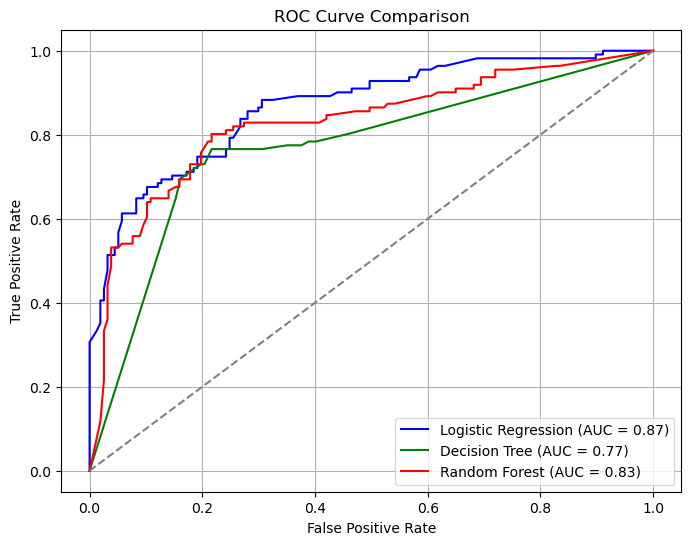

In [365]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curves
l_fpr, l_tpr, _ = roc_curve(ytest, l_probs)
d_fpr, d_tpr, _ = roc_curve(ytest, d_probs)
r_fpr, r_tpr, _ = roc_curve(ytest, r_probs)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(l_fpr, l_tpr, label="Logistic Regression (AUC = {:.2f})".format(l_auc), color="blue")
plt.plot(d_fpr, d_tpr, label="Decision Tree (AUC = {:.2f})".format(d_auc), color="green")
plt.plot(r_fpr, r_tpr, label="Random Forest (AUC = {:.2f})".format(r_auc), color="red")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Baseline (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In this project, I analyzed the Titanic dataset to predict passenger survival using three different classification models:
Logistic Regression → Works well for binary classification problems. 
Decision Tree → Captures non-linear relationships but may overfit. 
Random Forest → An ensemble method that reduces overfitting.

Key Metrics and Results: AUC Scores (Area Under the Curve for model comparison):

Logistic Regression AUC: 0.87  Strong linear performance.

Decision Tree AUC: 0.77  Decent but can be improved with pruning.

Random Forest AUC: 0.83  Performs better due to averaging multiple trees.

Approach:
                                   
Cleaned and preprocessed the Titanic dataset (handled missing values).
Trained three models on selected features (Pclass, Age, SibSp, Fare). 
Compared their performance using ROC curves and AUC scores. 
Visualized results using matplotlib ROC curves for better model evaluation.